In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
ml = pd.read_csv("./../../data/CO2/co2_mount_loa.csv")
so = pd.read_csv("./../../data/CO2/co2_south_pole.csv")
cg = pd.read_csv("./../../data/CO2/co2_cape_grim.csv")

FileNotFoundError: [Errno 2] File b'./../../data/CO2/co2_cape_grim.csv' does not exist: b'./../../data/CO2/co2_cape_grim.csv'

In [87]:
ml.head()

,Date,CO2
0,1958.0411,-99.99
1,1958.1260,-99.99
2,1958.2027,315.70
3,1958.2877,317.46
4,1958.3699,317.51


In [88]:
so.head()

,Date,CO2
0,1957.0411,-99.99
1,1957.1260,-99.99
2,1957.2027,-99.99
3,1957.2877,-99.99
4,1957.3699,-99.99


In [89]:
cg.head()

,Date,CO2,SD,Source
0,1976.3689,328.861,0.165,in situ
1,1976.4536,328.988,0.285,in situ
2,1976.5355,329.653,0.282,in situ
3,1976.6202,330.550,0.201,in situ
4,1976.7049,330.872,0.234,in situ


## Plot of CO2 of each station

In [131]:
# Clean and mask out missing values.
ml_nan = ml.CO2.replace(-99.99, np.nan)
ml_mask = np.isfinite(ml_nan)

ml_new = pd.DataFrame([ml.Date[ml_mask], ml_nan[ml_mask]]).T.reset_index(drop=True)

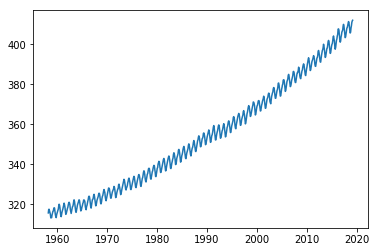

In [91]:
plt.plot(ml_timemask, ml_newmask)

In [135]:
# Clean and mask out missing values.
so_nan = so.CO2.replace(-99.99, np.nan)
so_mask = np.isfinite(so_nan)

so_new = pd.DataFrame([so.Date[so_mask], so_nan[so_mask]]).T.reset_index(drop=True)

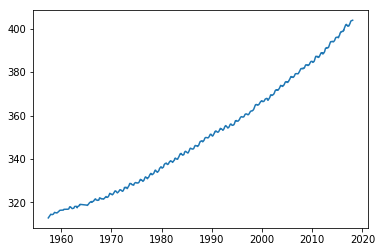

In [93]:
plt.plot(so_timemask, so_newmask)

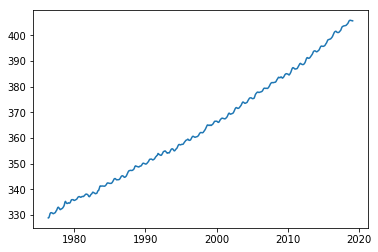

In [94]:
# Cape Grim data is clean.
plt.plot(cg.Date, cg.CO2)

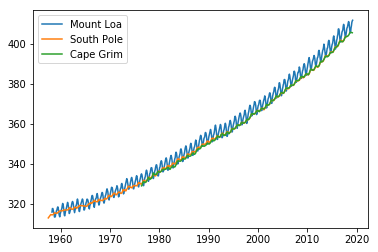

In [95]:
plt.plot(ml_timemask, ml_newmask)
plt.plot(so_timemask, so_newmask)
plt.plot(cg.Date, cg.CO2)
labels = ['Mount Loa', 'South Pole', 'Cape Grim']
plt.legend(labels)

# Correlation of stations

### Southern Hemispheric Stations

In [96]:
cg_so = pd.DataFrame([cg.CO2, so_newmask], index=['Cape Grim', 'South Pole'])

In [97]:
cg_so.transpose().corr(method='pearson')

,Cape Grim,South Pole
Cape Grim,1.000000,0.997237
South Pole,0.997237,1.000000


### Mount Loa and South Pole

In [98]:
ml_so = pd.DataFrame([ml_newmask, so_newmask], index=['Mount Loa', 'South Pole'])

In [99]:
ml_so.transpose().corr(method='pearson')

,Mount Loa,South Pole
Mount Loa,1.000000,0.995162
South Pole,0.995162,1.000000


### Mount Loa and Cape Grim

In [100]:
ml_cg = pd.DataFrame([ml_newmask, cg.CO2], index=['Mount Loa', 'Cape Grim'])

In [101]:
ml_cg.transpose().corr(method='pearson')

,Mount Loa,Cape Grim
Mount Loa,1.000000,0.992328
Cape Grim,0.992328,1.000000


In [102]:
ml_newmask[450:462].std()

2.026853622258059

In [103]:
cg.CO2[450:462].std()

0.8706665158476021

In [104]:
so_newmask[450:462].std()

0.5278336227764667

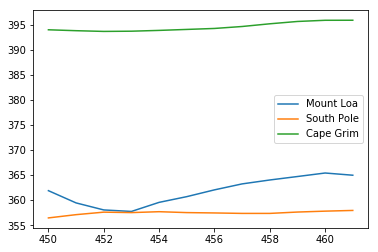

In [105]:
plt.plot(ml_new[450:462])
plt.plot(so_new[450:462])
plt.plot(cg.CO2[450:462])
labels = ['Mount Loa', 'South Pole', 'Cape Grim']
plt.legend(labels)

# Annually-averaged CO2

In [106]:
# Function to annually-average the monthly CO2 values.
def annual_ave(year_data, values_data):
    data_floor_date = np.floor(year_data)

    data_year = []
    data_annual_values = []
    for year in range(int(np.min(data_floor_date)),
                      int(np.max(data_floor_date))
                     ):
        data_year_co2 = np.mean(values_data[data_floor_date==year])
        data_year.append(year)
        data_annual_values.append(data_year_co2)

    return (pd
            .DataFrame([data_year, data_annual_values],
                       index = ['Year', 'CO2']
                      )
            .transpose()
           )             

In [107]:
# Mount Loa
ml_annual_ave = annual_ave(ml.Date, ml_new)

In [108]:
# Cape Grim
cg_annual_ave = annual_ave(cg.Date, cg.CO2)

In [109]:
# South Pole
so_annual_ave = annual_ave(so.Date, so_new)

In [110]:
so_annual_ave.head()

,Year,CO2
0,1957.0,313.630000
1,1958.0,314.706667
2,1959.0,315.635000
3,1960.0,316.616667
4,1961.0,317.387500


### Plot the annual averages of each station

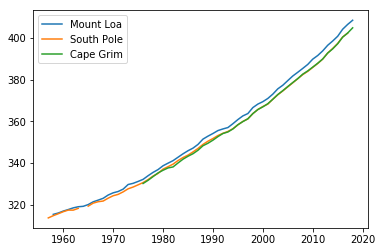

In [111]:
plt.plot(ml_annual_ave.Year, ml_annual_ave.CO2)
plt.plot(so_annual_ave.Year, so_annual_ave.CO2)
plt.plot(cg_annual_ave.Year, cg_annual_ave.CO2)
labels = ['Mount Loa', 'South Pole', 'Cape Grim']
plt.legend(labels)

## Correlation of annually-averaged CO2

### Cape Grim and South Pole

In [112]:
cg_so_annual = pd.DataFrame([cg_annual_ave.CO2,
                             so_annual_ave.CO2],
                     index=['Cape Grim', 'South Pole'])
cg_so_annual.transpose().corr(method='pearson')

,Cape Grim,South Pole
Cape Grim,1.000000,0.997897
South Pole,0.997897,1.000000


### Mount Loa and South Pole

In [113]:
ml_so_annual = pd.DataFrame([ml_annual_ave.CO2,
                             so_annual_ave.CO2],
                     index=['Mount Loa', 'South Pole'])
ml_so_annual.transpose().corr(method='pearson')

,Mount Loa,South Pole
Mount Loa,1.000000,0.999826
South Pole,0.999826,1.000000


### Mount Loa and Cape Grim

In [114]:
ml_cg_annual = pd.DataFrame([ml_annual_ave.CO2,
                             cg_annual_ave.CO2],
                     index=['Mount Loa', 'Cape Grim'])
ml_cg_annual.transpose().corr(method='pearson')

,Mount Loa,Cape Grim
Mount Loa,1.000000,0.998668
Cape Grim,0.998668,1.000000


## Plot of the difference between Mount Loa and South Pole

This plot will show any possible upward trends, showing that the northern hemisphere emissions increase constantly compared to SH concentration levels.

### Monthly observations

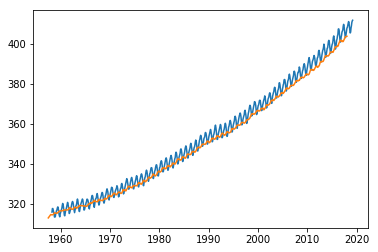

In [115]:
plt.plot(ml_timemask, ml_newmask)
plt.plot(so_timemask, so_newmask)

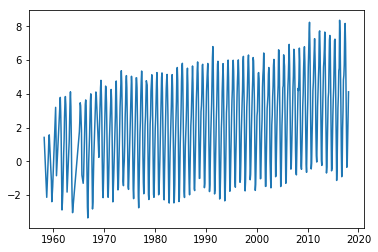

In [164]:
diff_merge = ml_new.merge(so_new, on=['Date'])
diff = diff_merge.CO2_x - diff_merge.CO2_y
diff_merge = pd.DataFrame([diff_merge.Date, diff]).T.reset_index(drop=True)
diff_merge = diff_merge.rename(columns={'Unnamed 0': 'Diff'})
plt.plot(diff_merge.Date, diff_merge.Diff)

### Annually-averaged

In [186]:
# Annually-averaged differnce between ml and so.
diff_annual_ave = annual_ave(diff_merge.Date, diff_merge.Diff)
diff_annual_ave = diff_annual_ave.rename(columns={'Year':'Date', 'CO2':'Diff'})

# Mask dataframe.
diff_annave_mask = np.isfinite(diff_annual_ave.Diff)

diff_annave_new = pd.DataFrame([diff_annual_ave.Date[diff_annave_mask],
                                diff_annual_ave.Diff[diff_annave_mask]]).T.reset_index(drop=True)

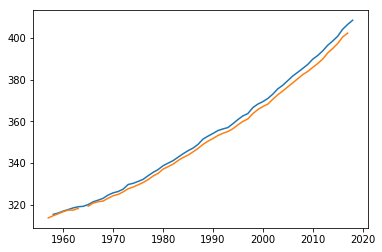

In [142]:
plt.plot(ml_annual_ave.Year, ml_annual_ave.CO2)
plt.plot(so_annual_ave.Year, so_annual_ave.CO2)

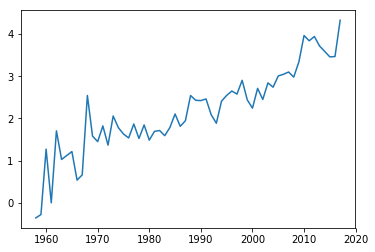

In [190]:
plt.plot(diff_annave_new.Date, diff_annave_new.Diff)

### Scatter plot: Difference in concentrations b/w stations and global annual emissions

In [191]:
emissions_df = pd.read_csv('./../gcb_data/budget.csv')
emissions = emissions_df['fossil fuel and industry']

In [222]:
# Get values for common years.
emissions_1964 = emissions[np.arange(len(emissions))!=5].reset_index(drop=True)
diff_annavenew = diff_annave_new[1:]

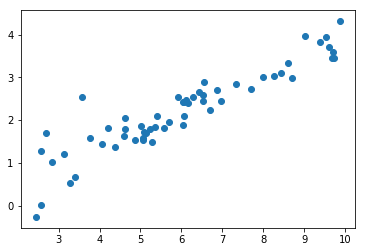

In [224]:
plt.scatter(emissions_1964, diff_annavenew.Diff)

In [226]:
stats.linregress(emissions_1964, diff_annavenew.Diff)

LinregressResult(slope=0.4184226710780932, intercept=-0.2806317583986, rvalue=0.9216194881253723, pvalue=1.0978707747103025e-24, stderr=0.02354546595705434)

In [227]:
emissions_1964

0     2.453378
1     2.568376
2     2.579724
3     2.685099
4     2.832715
5     3.129408
6     3.287543
7     3.392743
8     3.565352
9     3.779047
10    4.051805
11    4.205709
12    4.373360
13    4.610634
14    4.618881
15    4.592151
16    4.858344
17    5.009672
18    5.065966
19    5.347770
20    5.291510
21    5.127490
22    5.082990
23    5.062622
24    5.244778
25    5.401916
26    5.566580
27    5.707536
28    5.917333
29    6.046489
30    6.053987
31    6.121555
32    6.057616
33    6.046164
34    6.150064
35    6.279319
36    6.420027
37    6.527110
38    6.546120
39    6.531267
40    6.702700
41    6.860808
42    6.958021
43    7.332625
44    7.693122
45    7.984418
46    8.266058
47    8.427987
48    8.699715
49    8.603478
50    9.024741
51    9.377010
52    9.530374
53    9.609139
54    9.690455
55    9.678697
56    9.736654
57    9.867157
Name: fossil fuel and industry, dtype: float64